# FLIP (00): Data Science 
**(Module 02: Data Visualization)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use,but NOT allowed to change and distribute this package.

Prepared by and for 
**Student Members** |
2006-2018 [TULIP Lab](http://www.tulip.org.au), Australia

---

# Session C - `Pyplot`

In a previous lesson we discussed the three interfaces of matplotlib, and of the two officially supported interfaces, the `pyplot` interface is the most common way to interact with the library. In this lesson, we'll cover some of the basics of the `pyplot` interface and see a few examples of it in action. 

<!---And, in the coming lessons we'll go a little more in depth into a few of the most commonly used plotting functions.--->

## Introduction


`matplotlib.pyplot` is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In `matplotlib.pyplot` various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes (please note that “axes” here and in most places in the documentation refers to the axes part of a figure and not the strict mathematical term for more than one axis).


## Importing the Interface

Rather than talk at length about the `pyplot` interface, let's just go ahead and jump right in and start playing around with it. The very first thing you'll want to do is set the notebook up for showing matplotlib output inline. The very first line of code below shows how to do this by calling the `%matplotlib` magic function and passing in the term `'inline'`. 

In [91]:
%matplotlib inline

Following that, you'll want to import the `pyplot` module, and if you remember from an earlier lesson, I mentioned that pretty much every module you'll use in matplotlib, and the scientific python stack for that matter, has an agreed upon way to import it. Line two shows the canonical way to import the `pyplot` module. 

In [92]:
import matplotlib.pyplot as plt

Finally, if you're following along on the command line, you'll need to call the `pyplot.ion()` function that you see in the next cell. Don't worry about what it does just yet, we'll learn about that in just a bit, but for now go ahead and call it so you can follow along with the rest of the tutorial.

In [93]:
# This does nothing after calling %matplotlib inline,
# but it turns on interactive mode in the command line.
plt.ion()

NOTE: The code in the next cell is only needed if you're running the code on a retina-enabled, or for you non-Mac users, a high PPI display.

### Retina Screens

The last thing that I want to cover before we end this lesson is using matplotlib on a retina enabled device. If, like me, you're on a mac that has a retina screen, you may have noticed that the plot above looks a tad bit fuzzy. If you've run into this issue, fear not, IPython provides a function that allows you to specify the output formats that you want to support, and one of those just happens to be the 'retina' format. 

To add support for retina output, you'll have to import a function called `set_matplotlib_formats` from the `IPython.display` module. Then call it and pass in the string `'retina'`. Once you've executed the `set_matplotlib_formats` function, you should be able to rerun the example plot that we created above and now see it print out in full retina glory!

In [94]:
# Turn on retina mode
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Understanding the `pyplot` Interface

Before we go any further, there are a few things that you need to understand about the `pyplot` interface that will make working with matplotlib a lot smoother. First, the `pyplot` interface is a stateful interface, and second, it has two modes: interactive and non-interactive mode. 

### A Stateful Interface

Now, what do I mean when I say that `pyplot` provides a "stateful interface"? Well, when you create a visualization there are usually several steps you need to work through to get it just right. For example, you'll need to plot the data itself. Then, you may need to adjust the limits of the axes, and possibly change the labels for the tick marks as well.  To make the visualization easier to understand, you may want to add x- and y-axis labels, a title, and maybe even a legend. Doing all of these modifications in one command would be tough enough from a script, but in an interactive interpreter session, like this one, it would be simply too painful to even bother with. Instead, a better way to do this would be to perform each change in a seperate step allowing you to focus on one task at a time. The `pyplot` interface does exactly that through its "stateful interface". 

In short, every `pyplot` function you call changes the internal state of the current visualization. So, a call to the `plot()` function, for example, may create several objects in the background, or simply update existing ones that were created by a previous function call. The point is, you don't have to worry about creating instances of classes or modifying them directly, instead you can just focus on the visualization. 

Let's give the stateful interface a try now by building up a simple plot. We'll start by plotting a few randomly generated lines, then we'll add a title to our plot to make it a bit easier to understand what it's displaying. We'll do this in two separate steps to show off the stateful nature of the `pyplot` interface.

So, first things first, let's import the numpy library to give us access to some nice functions for generating random data. 

In [95]:
import numpy as np

Now, we can create our plot. First, we'll create a `for` loop, and at each iteration, we'll plot some randomly generated, normally distributed data by calling the `numpy.random.randn` function. After you plot your data, call the `pyplot.title` function to add the title "Normally Distributed Random Samples" to the plot.

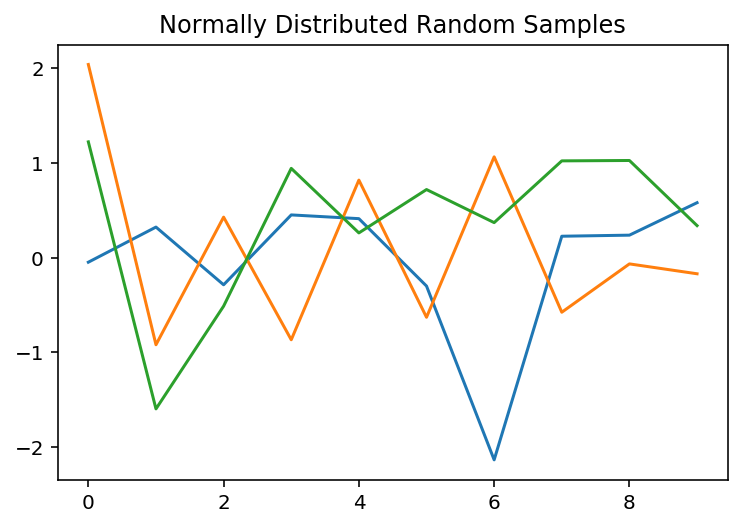

In [96]:
# Plot 3 randomly generated lines
for i in range(3):
    plt.plot(np.random.randn(10))

# Add a title to the plot
plt.title('Normally Distributed Random Samples');

The main thing to notice here is that we had four different interactions with the `pyplot` module: 3 calls to the `plot()` function and 1 to the `title()` function, and in each case, the result was that the current visualization was updated with the requested change. The components of that visualization, i.e., the class instances that make up the visualization, are completely invisible to us. Instead, we simply concentrate on the how the visualization should look and ignore everything that goes into making that visualization. This ends up being such an intuitive interface, and it's easy to see why this is the preferred method for interactive data visualization with matplotlib. You essentially lower your cognitive load by concentrating on only one aspect of a visualization at a time and build it up step-by-step.

### Interactive Mode

Now, if you're working from the command line, you may have noticed that the very first call to the `plot` function caused a new figure to pop up in a separate window. The subsequent call to the `title` function actually updated the already existing figure like magic, right in front of your eyes. That's because the call you made earlier to the `ion` function turned on `pyplot's` interactive mode. In interactive mode, every call you make to the `pyplot` module results in a change to the currently displayed figure. Without interactive mode turned on, you would need to call the `pyplot.show` function to display the current figure, but you would lose the ability to interact with that figure once you did. You can give it a try now by first calling the `pyplot.ioff` function to turn off interactive mode.

In [100]:
plt.ioff()

Incidentally, you can always check if you're currently in interactive mode by calling the `plt.isinteractive()` function. Let's try it out now.

In [101]:
print(plt.isinteractive())

False


Now that we've turned off interactive mode, we can make any number of calls to the `pyplot` interface, and you won't see any output until you call the `pyplot.show` function. Let's give it a try now by plotting a histogram of some randomly generated data.

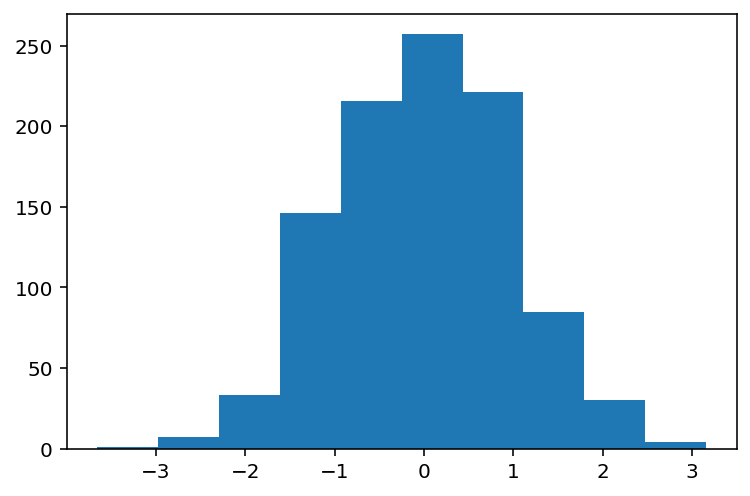

In [102]:
plt.hist(np.random.randn(1000));

If you're following along from the command line, you should no longer be seeing a figure pop up when you ran the last line of code. However, for those of you following along in a Jupyter notebook, you may have noticed that a histogram plot appeared as soon as you executed the previous cell. Unfortunately, turning off interactive mode in a notebook is not as easy as just calling the `pyplot.ioff` function. The reason is that our earlier call to the `%matplotlib inline` magic function does a little bit of extra setup for us to get interactive mode working properly in a notebook. So, to turn off interactive mode in this case, we'll need to undo that extra setup. Specifically, an event listener was added to the `'post_execute'` event that will flush the current figure every time we execute the code in a cell. To remove the event listener, we'll first need to grab a reference to the current IPython shell (the one we're currently interacting with), and then we'll remove the `flush_figures` function from the `'post_execute'` event listener for the current shell. 

So, let's get started by first getting a reference to the current shell. To do so, you can simply call the `get_ipython()` function. 

In [103]:
# Get a reference to the current IPython shell
shell = get_ipython()

Once you have a reference to the current IPython shell, you can call the `unregister` function on the `events` object and pass in the name of the event, in our case that'll be the `'post_execute'` event, followed by a reference to the event handler that we want to remove from the listener, which will be the `flush_figures` function. To do this, we'll first need to import the `flush_figures` function.

In [104]:
# Import the event handler function that we are trying to unregister
from ipykernel.pylab.backend_inline import flush_figures

Then, we can remove the `flush_figures` function from the list of callback functions registered with the `post_execute` event listener. To do that, we simply call the `unregister` function and pass in the event name and function reference. 

In [105]:
# Unregister the event handler for the current shell session
shell.events.unregister('post_execute', flush_figures)

Now, we should be able to call the `pyplot.hist` function again without displaying anything.

In [106]:
plt.hist(np.random.randn(1000));

To show our plot now, we'll need to call the `pyplot.show` function, so let's go ahead and do that now.

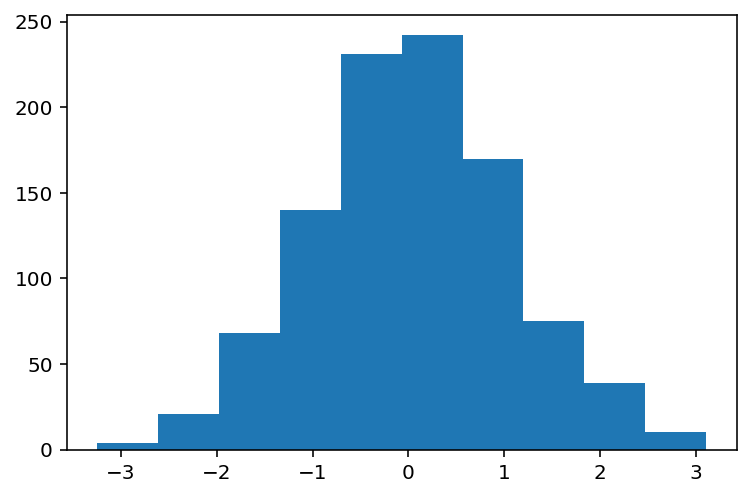

In [107]:
plt.show()

Having that extra step of calling the `show` function may seem a little unecessarily burdensome to you, but I assure you both modes have their uses. Obviously, when working with your data interactively, as we've been doing here, interactive mode is the way to go. However, if you plan on writing a script to process data "offline" and create a handful of visualizations with that data, non-interactive mode is the one to choose. In fact, the default mode for matplotlib is non-interactive as is evidenced by the fact that you have to explicitly turn on interactive mode in both the command line interpreter and a Jupyter notebook (remember the call we made to the `%matplotlib inline` magic function did that for us). 

So, in short, when writing a script to create visualizations with matplotlib, leave interactive mode off. However, when interacting directly with your data in a command line, or Jupyter notebook session, having interactive mode on makes the interaction much more pleasant on the whole.

## Conclusion

And, with that said, we've come to the end of this session. To recap, in this lesson, we learned about `pyplot`'s stateful interface, and we played around with both the interactive and non-interactive modes a bit and learned when it's appropriate to use each one. Though this lesson is done, we're not done with the `pyplot` interface just yet. Over the next several lessons we'll explore what the `pyplot` interface has to offer by diving into each of the most commonly used plotting functions in the `pyplot` module.  